<h1 align='center' ><b><i> Crimes Patterns In Boston </b></i></h1>

<p align=center>
  <img src="https://live.staticflickr.com/65535/51728157715_ff5aa3f2e3_z.jpg" width="50%">
</p>


As a vibrant financial, commercial and industrial centre, Boston offers plenty of opportunities for work and play. And let's not forget the world-renowned universities in nearby Cambridge, including Harvard University and the Massachusetts Institute of Technology (MIT).

Boston is a fantastic city, ranked 6th in the US and 12th in the world for its economy. It is a hub for technology companies and a leader in biotechnology. It also boasts the country's oldest working industrial and fishing port, making it a vital link to the sea.

The city is famous for its rich culture, including the first public library in the US, as well as its vibrant music scene, museums and cinema. Over the years, it has served as the backdrop for many iconic films, including The Departed (2006), The Social Network (2010), Good Will Hunting (1997) and Spotlight (2015), the latter two of which won two Oscars each.

In summary, this major city offers excellent infrastructure and a wealth of business opportunities. However, like all major cities around the world, it also faces its fair share of challenges. The severity of a crime is determined by its size.

According to the [WalletHub](https://wallethub.com/edu/safest-cities-in-america/41926) survey conducted in October 2023, Boston ranked 101st among the safest cities in the US, with a final score of 73.25. This result shows that Boston is a safe city to live in, and we can be confident in its safety measures. The survey analysed 41 safety indicators in 180 cities to determine this ranking. Boston has a crime rate of 37.3 out of 100, which is higher than the US average of 22.7, according to [Best Places](https://www.bestplaces.net/crime/city/massachusetts/boston). However, it's important to note that this ranking takes into account factors such as cost of living, schools, and home prices. Despite the higher crime rate, Boston remains a great place to live and work, with many opportunities for growth and success.

The datasets we used was obtained from Analyze Boston [crime incident reports](https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system) and [shooting](https://data.boston.gov/dataset/shootings). The data provided covers the period between 15 June 2015 and 14 October 2024.

In this project, we will analyze and look for trends such as, 
  * Which is the average of crimes/homicides per day over the years?
  * How the crime changes in each month over the years?
  * How hours affect crimes over the monhts?
  * UCR Part is influenced by the time?
  * Which neighbourhoods have more incidents?
  * There are any difference between the days of the week?
  * What are the offense type that appears most for UCR Part?
  * Which Police District has more records?
  * Which gender is more affected by shootings?
  * Do black people really suffer more from gun-related incidents?

By answering these questions, we want to show what are the most critical areas in Boston when we talk about safety.


Now let's import some useful libraries.

### <span style='color: #339966'>***Data Analysis***


In [1]:
#Data processing libraries
import numpy as np
import pandas as pd

#EDA libraries
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

#Don't show warning messages
import warnings

warnings.filterwarnings('ignore')

#Configure Pandas options
pd.set_option('max_seq_items', None)
pd.set_option('display.max_columns', 30)

#Define plot style
sns.set_style("dark", {'axes.grid' : False})
sns.set_palette("Reds_r")

%matplotlib inline

#### <span style='color: #6fa832'>***Data Dictionary***
The Data Dictionary can be found at this [link](https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system/resource/9c30453a-fefa-4fe0-b51a-5fc09b0f4655) for the crime dataset and at [this](https://data.boston.gov/dataset/shootings/resource/15e2652a-99df-4d40-8eae-da7d1dd226f3) for the shootings dataset.

**Crimes**
* **Incident_number:** Internal BPD number
* **Offense_code:** Numerical code of offense description
* **Offense_code_group:** Internal categorization of *Offense_code*
* **Offense_description:** Primary descriptor of incident
* **District:** What district the crime was reported in
* **Reporting_area:** RA number associated with where the crime was reported from
* **Shooting:** Indicated a shooting took place
* **Occurred_on_date:** Earliest date and time the incident could have taken place
* **Year:** The year that the crime occurred
* **Month:** The month that the crime occurred
* **Day_of_week:** The day of the week that the crime occurred
* **Hour:** The hour that the crime occurred
* **UCR_part:** Universal Crime Reporting Part number(1,2,3)
* **Street:** Street name the incident took place
* **Lat:** Latitude the incident took place
* **Long:** Longitude the incident took place
* **Location:** Location the incident took place
* **Suburb:** Suburb the incident took place

**Shootings**
* **Shooting_Date:**	Date of offense
* **District:**	Boston Police District where offense occurred.
* **Shooting_Type_V2:**	Values are "Fatal" or "Non-Fatal"
* **Victim_Gender:**	Gender of the victim
* **Victim_Race:**	Race of the victim
* **Victim_Ethnicity_NIBRS:**	Ethnicity of the victim
* **Multi_Victim:**	Used to help denote multiple victims shot during the same incident

#### <span style='color: #6fa832'>***Importing Crime Incident Reports Dataset***

In [2]:
#Import dataset 
path = '../DataSets/boston_clean.csv'
boston = pd.read_csv(path, parse_dates=['OCCURRED_ON_DATE'])

#Show first five rows
boston.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Suburb,Date
0,I172040657,2629,Harassment,Harassment,C11,397,0,2015-06-15,2015,6,Monday,0,Part Two,Melbourne Street,42.29109287,-71.06594539,"(42.291093,-71.065945)",Dorchester,2015-06-15
1,I182061268,3201,Property Lost,Property - Lost,B3,,0,2015-06-15,2015,6,Monday,0,Part Three,Bernard Street,Unknonw,Unknonw,Unknonw,Unknown,2015-06-15
2,I162013546,3201,Property Lost,Property - Lost,B3,433,0,2015-06-15,2015,6,Monday,0,Part Three,Norfolk Street,42.28363434,-71.0828132,"(42.283634,-71.082813)",Dorchester,2015-06-15
3,I152051083,3115,Investigate Person,Investigate Person,A7,20,0,2015-06-15,2015,6,Monday,0,Part Three,Paris Street,42.37702319,-71.0322473,"(42.377023,-71.032247)",East Boston,2015-06-15
4,I152059178,2647,Other,Threats To Do Bodily Harm,C11,359,0,2015-06-15,2015,6,Monday,0,Part Two,Washington Street,42.29360585,-71.0718865,"(42.293606,-71.071887)",Dorchester,2015-06-15


In [3]:
#Dataset Shape
print(f"The dataset has {boston.shape[0]} rows and {boston.shape[1]} columns.")

The dataset has 795286 rows and 19 columns.


In [4]:
#Data type of each column
boston.dtypes

INCIDENT_NUMBER                object
OFFENSE_CODE                    int64
OFFENSE_CODE_GROUP             object
OFFENSE_DESCRIPTION            object
DISTRICT                       object
REPORTING_AREA                 object
SHOOTING                        int64
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY_OF_WEEK                    object
HOUR                            int64
UCR_PART                       object
STREET                         object
Lat                            object
Long                           object
Location                       object
Suburb                         object
Date                           object
dtype: object

#### <span style='color: #6fa832'>***Check for duplicate rows***


In [5]:
#Duplicates
boston[boston.duplicated()]['INCIDENT_NUMBER'].nunique()

0

In [6]:
#Check duplicates
boston.loc[boston.duplicated()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Suburb,Date


In [7]:
#See an example of a duplicated line
boston[boston['INCIDENT_NUMBER'] == 'I140056633-00']

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Suburb,Date
385,I140056633-00,2910,Violations,Val - Operating After Rev/Susp.,A1,64,0,2015-06-16 15:55:00,2015,6,Tuesday,15,Part Two,Fruit Street,42.36240281,-71.06954652,"(42.362403,-71.069547)",West End,2015-06-16
387,I140056633-00,3125,Warrant Arrests,Warrant Arrest,A1,64,0,2015-06-16 15:55:00,2015,6,Tuesday,15,Part Three,Fruit Street,42.36240281,-71.06954652,"(42.362403,-71.069547)",West End,2015-06-16


There are several lines where the incident number is the same, we can see that there is more than one recorded offence, as we can see above. The incident number I140056633-00 has two different offences, but seven entries, so we have 5 duplicate lines. These lines must be deleted.

In [8]:
#Dropping duplicates
boston.drop_duplicates(inplace=True)

In [9]:
#Data description, object columns
boston.describe(include='O').T

,count,unique,top,freq
INCIDENT_NUMBER,795286,753860,I162030584,13
OFFENSE_CODE_GROUP,795286,74,Motor Vehicle Accident Response,101032
OFFENSE_DESCRIPTION,795286,304,Investigate Person,59715
DISTRICT,795286,15,B2,117967
REPORTING_AREA,795286,884,,100253
DAY_OF_WEEK,795286,7,Friday,121218
UCR_PART,795286,4,Part Three,396608
STREET,795286,4324,Washington Street,48649
Lat,795286,72042,Unknonw,44247
Long,795286,71421,Unknonw,44247


Looking at the table above, we can already get some ideas. It shows that District B2 appears most often, as well as Washington Street and Dorchester Suburb, which has the highest frequency in the dataset. We can also see that the day with the highest number of incidents is Wednesday. We'll look at these variables in more detail later.

#### <span style='color: #6fa832'>***Importing shooting dataset.*** 

This dataset contains some additional information about shootings in the city of Boston, such as gender, whether the shooting was fatal or whether there was more than one victim.


In [10]:
#Import Shooting dataset
shooting_path = '../DataSets/Shootings.csv'
shooting = pd.read_csv(shooting_path, parse_dates=['shooting_date'])

#Show first five rows
shooting.head()

,incident_num,shooting_date,district,shooting_type_v2,victim_gender,victim_race,victim_ethnicity_nibrs,multi_victim
0,I152000196-00,2015-01-01 13:30:00+00:00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
1,I152000879-00,2015-01-04 01:58:00+00:00,E18,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
2,I152001014-00,2015-01-04 18:52:00+00:00,E5,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
3,I152002232-00,2015-01-08 22:45:00+00:00,B2,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t
4,I152002233-00,2015-01-08 22:45:00+00:00,B2,Non-Fatal,Female,Black or African American,Not Hispanic or Latinx,t


In [11]:
#Dataset shape
print(f"The shooting dataset has {shooting.shape[0]} rows and {shooting.shape[1]} columns.")

The shooting dataset has 2026 rows and 8 columns.


In [12]:
#Duplicates
shooting[shooting.duplicated()]['incident_num'].nunique()

91

In [13]:
#See an example of a duplicated line
shooting[shooting['incident_num'] == 'I172053412']

,incident_num,shooting_date,district,shooting_type_v2,victim_gender,victim_race,victim_ethnicity_nibrs,multi_victim
581,I172053412,2017-07-02 23:10:00+00:00,B2,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t
582,I172053412,2017-07-02 23:10:00+00:00,B2,Non-Fatal,Male,White,Hispanic or Latinx,t
583,I172053412,2017-07-02 23:10:00+00:00,B2,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t


In [14]:
#Drop duplicates
shooting.drop_duplicates(inplace=True)

As with the Boston dataset, we have dropped the duplicate lines.

In [15]:
#Data type of each column
shooting.dtypes

incident_num                           object
shooting_date             datetime64[ns, UTC]
district                               object
shooting_type_v2                       object
victim_gender                          object
victim_race                            object
victim_ethnicity_nibrs                 object
multi_victim                           object
dtype: object

In [16]:
#Data shooting description, object columns
shooting.describe(include='O').T

,count,unique,top,freq
incident_num,1917,1688,232068420,5
district,1917,12,B2,570
shooting_type_v2,1917,2,Non-Fatal,1590
victim_gender,1913,3,Male,1697
victim_race,1901,4,Black or African American,1480
victim_ethnicity_nibrs,1886,3,Not Hispanic or Latinx,1328
multi_victim,1917,2,f,1411


This table shows us some shooting trends. As in the Boston Crimes dataset, District B2 appears most often. Most of the shootings were non-fatal, and the most common gender is male and, sadly, most of them are black or African American.<br>

To start our analysis, we'll create a new column containing only the date of the occurrence. We will use this column to create a new table that groups the data by year and date, the average number of crimes per day and the average number of homicides per year.

In [17]:
#Creates a new column containing only year-month-day
boston['Date'] = boston['OCCURRED_ON_DATE'].dt.date

In [18]:
#Groupby YEAR and Date
date_per_year = boston.groupby(['YEAR', 'Date'], as_index=False)['Date'].count()

In [19]:
#How many days we have in the dataset per year
days_per_year = date_per_year.groupby('YEAR', as_index=False).count()

In [20]:
#Average number of crimes per day per year
for year in days_per_year['YEAR'].values:
    days_per_year.loc[days_per_year['YEAR'] == year, 'Avg_Crimes_per_Day'] = \
        round(boston[boston['YEAR'] == year].shape[0] / days_per_year[days_per_year['YEAR'] == year]['Date'].values[0], 1)
    days_per_year.loc[days_per_year['YEAR'] == year, 'Avg_Homicide_per_Day'] = \
        round(boston[(boston['YEAR'] == year) & (boston['OFFENSE_CODE_GROUP'] == 'Homicide')].shape[0] / 
              days_per_year[days_per_year['YEAR'] == year]['Date'], 3)
    days_per_year.loc[days_per_year['YEAR'] == year, 'Avg_UCR_One'] = \
        round((boston[(boston['YEAR'] == year) & (boston['UCR_PART'] == 'Part One')].shape[0]) / 
            days_per_year[days_per_year['YEAR'] == year]["Date"])
    days_per_year.loc[days_per_year['YEAR'] == year, 'Avg_UCR_Two'] = \
        round((boston[(boston['YEAR'] == year) & (boston['UCR_PART'] == 'Part Two')].shape[0]) / 
            days_per_year[days_per_year['YEAR'] == year]["Date"])
    days_per_year.loc[days_per_year['YEAR'] == year, 'Avg_UCR_Three'] = \
        round((boston[(boston['YEAR'] == year) & (boston['UCR_PART'] == 'Part Three')].shape[0]) / 
            days_per_year[days_per_year['YEAR'] == year]["Date"])

### <span style='color: #339966'>Crimes Per Year</span> 
Let's start by looking at the number of crimes per year. The first thing to bear in mind is that the records for 2015 only start in June and those for 2024 end in October, so there are fewer entries for those years, as we can see below. If we only looked at the number of entries per year without taking this into account, we might incorrectly assume that there were fewer crimes in 2015 and 2023 than in other years. To avoid this, we calculate the average number of offences per day for each year. Looking at the graph, we can see that the average is similar to the others. Another thing that stands out in the graph is that the crime rate during the pandemic drops significantly in 2020 and 2021, but unfortunately starts to rise again in 2022 and 2023..

In [21]:
#Entries per year
boston['YEAR'].value_counts()

2017    101197
2016     99279
2018     98727
2019     87184
2023     77926
2022     73852
2021     71721
2020     70894
2024     61103
2015     53403
Name: YEAR, dtype: int64

#### <span style='color: #6fa832'>***Average number of crimes per day per year***

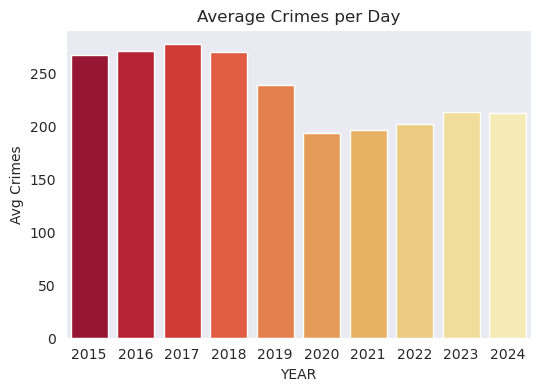

In [22]:
#Creates a figure to plot
fig, ax= plt.subplots(figsize=(6,4))

#Creates a bar chart showing the average number of crimes per day
sns.barplot(x=days_per_year['YEAR'], y=days_per_year['Avg_Crimes_per_Day'], palette='YlOrRd_r', ax=ax)

plt.xlabel('YEAR')
plt.ylabel('Avg Crimes')
plt.title('Average Crimes per Day')

#Show the plot
plt.show();

#### <span style='color: #6fa832'>***Average number of homicides per day per year***

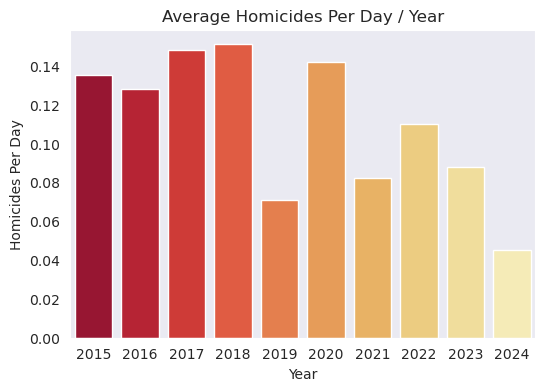

In [23]:
#Creates a figure to plot
fig, ax = plt.subplots(figsize=(6,4))

#Creates a bar chart showing the average number of homicides per day in each year.
sns.barplot(x =days_per_year['YEAR'] , y=days_per_year['Avg_Homicide_per_Day'], palette='YlOrRd_r', ax=ax)

plt.ylabel('Homicides Per Day')
plt.xlabel('Year')
plt.title('Average Homicides Per Day / Year')

#Show the plot
plt.show();

In 2019, Boston had the lowest rate of homicides per day, but in 2020 this rate increases significantly. According to this [article](https://pubmed.ncbi.nlm.nih.gov/32837168/),  published in PubMed, it follows the trend in the US, where there was a decrease in other crimes but an increase in homicides during the pandemic. It's just another reflex of this last dark period we've gone through.

Other rates for some common crimes (Average per year):
<table>
    <tr><th>Larceny:</th><td>12.57%</td><tr>
    <tr><th>Assault:</td><td>7.15%</td></tr>
    <tr><th>Drug Violation:</th><td>6.1%</td></tr>
    <tr><th>Burglary:</th><td>1.95%</td></tr>
    <tr><th>Theft:</th><td>1.98%</td></tr>
    <tr><th>Robbery:</th><td>1.25%</td></tr>
    <tr><th>Firearm:</th><td>0.71%</td></tr>
</table>

#### <span style='color: #6fa832'>***UCR Part over the years***
Uniform Crime Reporting, UCR, it is the program created by FBI in 1929 to compiles data about crimes in the USA. It provides numbers about crimes over the years in all the country. These numbers are used to generate several statistical reports like, Hate Crimes, Cargo Theft, Human Trafficking among others. <br>
The official division is Part I and Part II. Where Part I group together more serious crimes like, murder, forcible rape, robbery, theft, human trafficking and others. While Part II includes some crimes like, fraud, sexual offences, simple assault, embezzlement, missing persons and others.<br>
In this dataset we also have a Part III and Other classification that doesn't fit into the other two categories, some related to investigations, such as 'Investigate Person' or 'Warrant Arrests', and some misdemeanours, such as 'Verbal Disputes' and 'Licence Violations'.
As the category "Other" has only 1.65% of the data and is only to classify events as "Sick Assist", we will leave it out of the analysis.

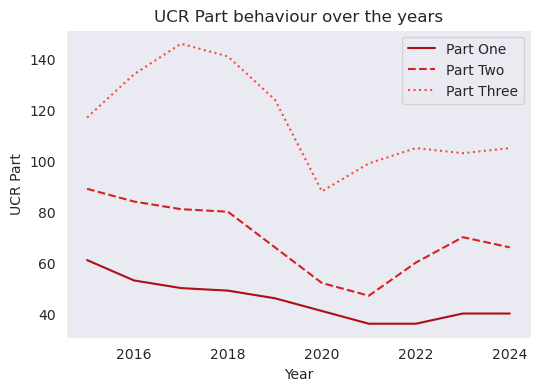

In [24]:
#Creates a figure to plot
fig, ax= plt.subplots(figsize=(6,4))

#Creates a line chart showing the behaviour of each UCR part over the years.
sns.lineplot(y=days_per_year['Avg_UCR_One'], x=days_per_year['YEAR'], label='Part One', ax=ax)
sns.lineplot(y=days_per_year['Avg_UCR_Two'], x=days_per_year['YEAR'], label='Part Two', linestyle='dashed', ax=ax)
sns.lineplot(y=days_per_year['Avg_UCR_Three'], x=days_per_year['YEAR'], label='Part Three', linestyle='dotted', ax=ax)

plt.ylabel("UCR Part")
plt.xlabel('Year')
plt.title('UCR Part behaviour over the years')

#Show the plot
plt.show();

Each UCR Part shows a different behavior over the years. While Part One declines and stabilizes, Parts Two and Three show a decline, but at some point in 2020 and 2021 they start to rise again. Remember that Part One refers to more serious crime, so that's a good thing.

#### <span style='color: #6fa832'>***Month Over the Years***

In [25]:
#Create a new table with months as rows and years as columns, the value being the total number of incidents registered in that month/year.
month_year = (boston.groupby(['YEAR', 'MONTH'], as_index=False)['INCIDENT_NUMBER'].count().pivot(
    index='MONTH', columns='YEAR', values='INCIDENT_NUMBER'
))

#Calculate the average number of crimes per day
for year in month_year:
    count =0
    while count < 12:
        month_year.iloc[count][year] = round(month_year.iloc[count][year] / boston[(boston['YEAR'] == year) & \
                                                                             (boston['MONTH'] == count+1)]['Date'].nunique(), 2)
        count+=1

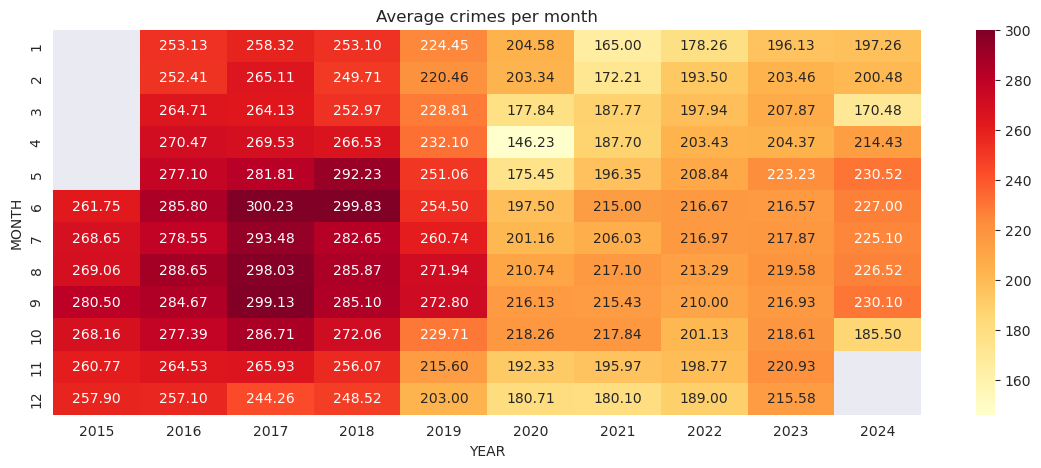

In [26]:
#Creates a figure to plot 
fig, ax=plt.subplots(figsize=(14,5))

#Creates a heatmap for month/year
sns.heatmap(month_year, annot=True, fmt='.2f' ,cmap='YlOrRd', ax=ax)
plt.title('Average crimes per month')

#Show the plot
plt.plot();

As the table above shows, although the values are different for each year and the crimes seem to be decreasing, there is a sort of trend in the number of crimes for each month along the year. Looking more closely at the figures, the months with the lowest number of incidents are December and January, with the only exception being 2020, which has the lowest rate in April, but remember that the Covid lockdown started in March 2020, also in march 2024. It's also clear that every year the number of offences starts to rise in March, peaks between May and October and then starts to fall. </br>
It may have something to do with the weather. December to February is winter, this strange phenomenon was reported in this [NBC News article](https://www.nbcnews.com/news/us-news/does-cold-stop-crime-it-seems-so-n309856).  According to this news, there really is a connection between the weather and crime.

In [27]:
def hour_month_year(year: int) -> pd.DataFrame:
    '''Retrieves the year and returns a new dataset containing the number of crimes per hour in each month that occurred in that year.'''
    
    return boston[boston['YEAR'] == year].groupby(['MONTH', 'HOUR'],as_index=False)['INCIDENT_NUMBER'].count().\
    pivot(index='HOUR', columns='MONTH', values='INCIDENT_NUMBER')

### <span style='color: #339966'>***Crimes per Hour***

#### <span style='color: #6fa832'>***Month Vs. Hour***

In [28]:
#Create a new data frame for each year in the Boston dataset using the function above
y2015 = hour_month_year(2015)
y2016 = hour_month_year(2016)
y2017 = hour_month_year(2017)
y2018 = hour_month_year(2018)
y2019 = hour_month_year(2019)
y2020 = hour_month_year(2020)
y2021 = hour_month_year(2021)
y2022 = hour_month_year(2022)
y2023 = hour_month_year(2023)
y2024 = hour_month_year(2024)

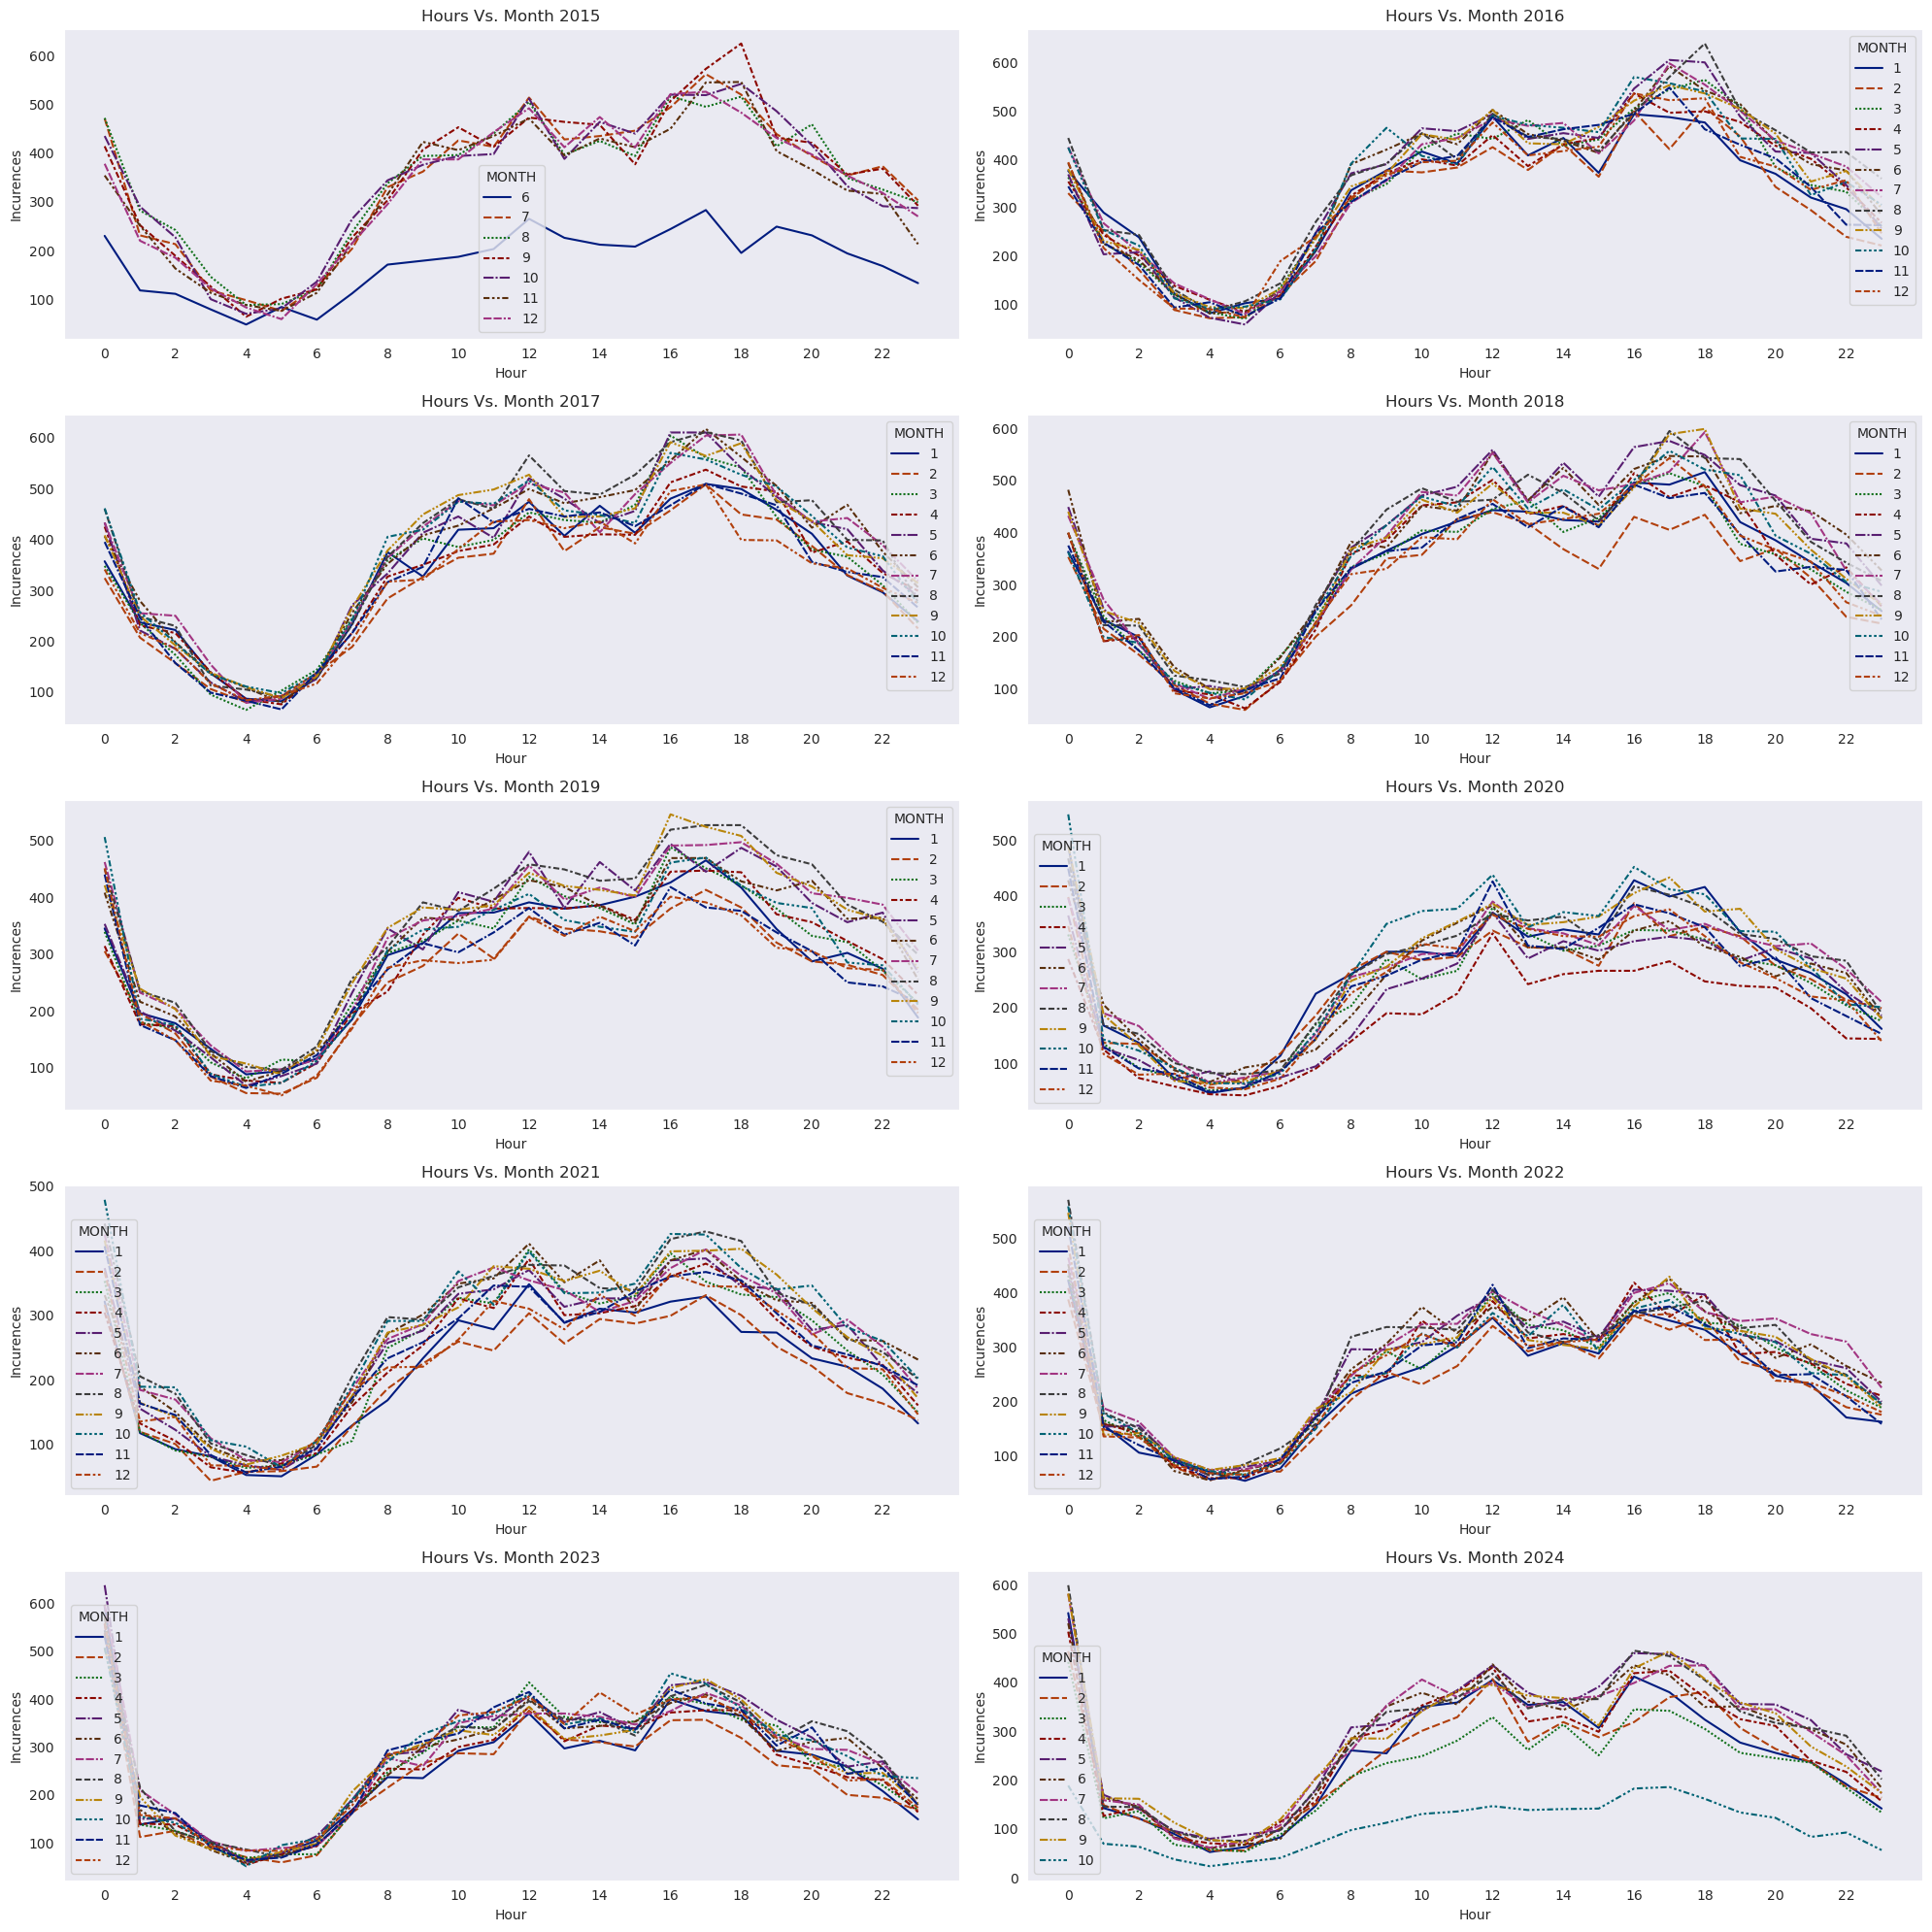

In [29]:
#Creates a list of the above variables
years =[y2015, y2016, y2017, y2018, y2019, y2020, y2021, y2022, y2023, y2024]

#Creates a figure to plot
fig, ax=plt.subplots(nrows=5, ncols=2, figsize=(20,20))

idx = 0 #Defines the plot position in the figure
y_title = 2015 #Defines the years to the title

#Creates a line chart for each variable
for year in years:
    idx +=1
    plt.subplot(5, 2, idx)
    ax = sns.lineplot(year, palette='dark')
    plt.title('Hours Vs. Month '+ str(y_title))
    plt.ylabel('Incurences')
    plt.xlabel('Hour')
    plt.xticks(np.arange(0, 24, 2))
    y_title+=1

#Show the plot
plt.tight_layout();

Although there are differences between the months, and it is clear that there are some changes from year to year, the hours in each month and each year behave quite similarly. With a peak at midnight, then a decline, and with the maximum number of occurrences, over 56%, between 10 am and 7 pm. There is an interesting and subtle change. Until 2018, crime was decreasing until 4 or 5 am, the hour with the lowest crime rate, but from 2019 on, the amount of crime at midnight seems to happen with more frequency and then have an abrupt fall at 1 am and keeps a low rate until 6 am, where it starts to increase again.


#### <span style='color: #6fa832'>***Shooting/Homicide Vs. Hour***

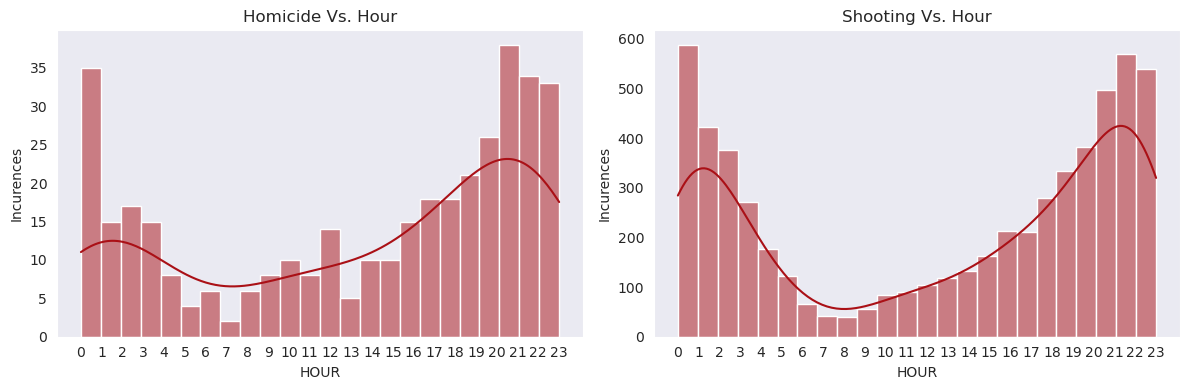

In [30]:
#Creates a figure to plot
fig, ax = plt.subplots(ncols=2, figsize=(12,4))

#Creates a histogram of homicides per hour and shootings per hour.
sns.histplot(boston[boston['OFFENSE_CODE_GROUP'] == 'Homicide']['HOUR'], kde=True, bins=24, ax=ax[0])
sns.histplot(boston[boston['SHOOTING'] == 1]['HOUR'], kde=True, bins=24, ax=ax[1])

ax[0].set_ylabel('Incurences')
ax[0].set_title('Homicide Vs. Hour')
ax[0].set_xticks(np.arange(0,24,1))

ax[1].set_ylabel('Incurences')
ax[1].set_title('Shooting Vs. Hour')
ax[1].set_xticks(np.arange(0,24,1))


#Show the plot
plt.tight_layout();

It is interesting to note that homicide and shootings follow a similar pattern. Both occur more frequently in the late hours. This is slightly different from the general hours pattern, where we see the peak in the afternoon.

#### <span style='color: #6fa832'>***UCR Part Vs. Hour***

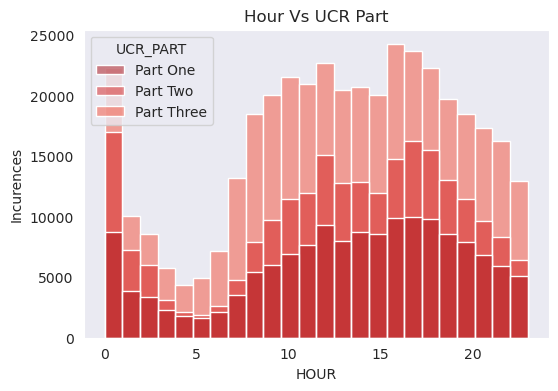

In [31]:
#Creates a figure to plot
fig, ax = plt.subplots(figsize=(6,4))

#Creates a histogram of Hour Vs UCR part
sns.histplot(x=boston[boston['UCR_PART'] != 'Other']['HOUR'], hue=boston['UCR_PART'], 
             hue_order=['Part One', 'Part Two', 'Part Three'],bins=24, ax=ax)

plt.ylabel('Incurences')
plt.xlabel('HOUR')
plt.title('Hour Vs UCR Part')

#Show the plot
plt.show();

The graphs above show that regardless of the UCR Part, they all follow the same hourly trend, with a peak at midnight and the lowest rates between 1am and 10am, when they start to rise again.

Here we have the percentage of occurrences of each UCR Part in the dataset. Some duplicate incident numbers have a different UCR Part, so if we sum the values below, it will not be 100, but we can get an idea of the UCR behaviour.
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>UCR Part</th>
      <th>Percentage</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Part One</th>
      <th>19.83%</th>
    </tr>
    <tr>
      <th>Part Two</th>
      <th>29.19%</th>
    </tr>
    <tr>
      <th>Part Three</th>
      <th>51.82%</th>
    </tr>
  </tbody>
</table>
</div>

### <span style='color: #339966'>***Crimes per Suburb***

Boston is divided into 24 suburbs. To visualise them, we will use the Shapefile found on the [Boston opendata](https://bostonopendata-boston.opendata.arcgis.com/datasets/9a3a8c427add450eaf45a470245680fc/explore) website.

In [94]:
#Read Shapefile of Boston Neighbourhoods
shp_bos = gpd.read_file('../Boston Shapefile/Neigborhood/BPDA_Neighborhood_Boundaries.shp')

#Drop columns
shp_bos.drop(["neighborho",	"acres", "SHAPE__Len", "objectid", "SHAPE__Are"], axis=1, inplace=True)

#Drop rows
shp_bos.drop([3, 25], inplace=True)

#Changes row 16 name 
shp_bos.loc[16, 'name'] = 'Fenway - Kenmore'

#Create a new column with the total number of crimes per suburb.
shp_bos['Total Crimes'] = shp_bos['name'].map(boston.groupby('Suburb', as_index=False)\
    ['INCIDENT_NUMBER'].nunique().set_index('Suburb')['INCIDENT_NUMBER'])

In [33]:
#Plot a map with suburb boundaries
shp_bos.explore(
    column='Total Crimes',
    scheme='Quantiles',
    k=4,
    tiles='OpenStreetMap',
    cmap='YlOrRd',
    style_kwds=dict(color='black', fillOpacity=0.7),
    map_kwds={'dragging':False},
    legend=True,
    tooltip=True,
    name='Boston',
    zoom_control=False,
    min_zoom=12,
    max_zoom=12
)

The map above shows the name of each suburb, the square miles and the total number of crimes recorded in that area. It classifies the total number of crimes into 5 different areas, from the lightest colour, lower total crimes, to the darkest colour, the most dangerous places.
Looking just at the map above, there are six suburbs that are shown in a dark colour, indicating that they are the most dangerous. However, four of these suburbs are also among the largest. Logically, the larger the area, the greater the number of crimes. So to be sure that these are the most problematic areas, we calculate the crime density per suburb by dividing the total crime by its square miles. We will also calculate the density of homicides.

In [97]:
#Create new columns
shp_bos['Crimes/Sqmiles'] = round(shp_bos['Total Crimes'] / shp_bos['sqmiles'], 2) #Total crime divided by square miles

shp_bos['Homicides'] = shp_bos['name'].map(boston.query("OFFENSE_CODE_GROUP=='Homicide' | OFFENSE_CODE_GROUP == 'Justifiable Homicide'").\
    groupby('Suburb', as_index=False)['INCIDENT_NUMBER'].nunique().set_index('Suburb')['INCIDENT_NUMBER']) #Total homicides per suburb
  
shp_bos['Homicides/Sqmiles'] = round((shp_bos['Homicides'] / shp_bos['sqmiles']), 2) #Total homicides divided by square miles

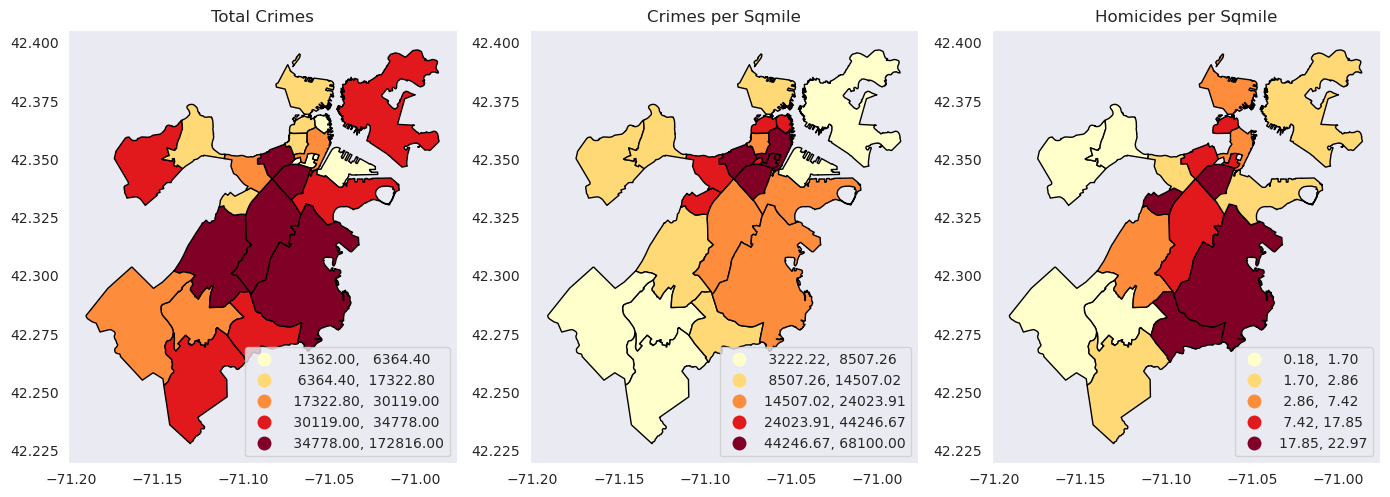

In [35]:
#Create a figure to plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,16))

#Create a map showing the Total Crimes column
shp_bos.plot(column='Total Crimes', 
             edgecolor='black',
             legend=True, 
             legend_kwds={'loc': 'lower right'},
             cmap='YlOrRd', 
             scheme='quantiles', 
             ax=axes[0])

#Create a map showing the Crime/sqmiles column
shp_bos.plot(column='Crimes/Sqmiles', 
             edgecolor='black',
             legend=True, 
             legend_kwds={'loc': 'lower right'},
             cmap='YlOrRd', 
             scheme='quantiles', 
             ax=axes[1])

#Create a map showing the Homicides/sqmiles column 
shp_bos.plot(column='Homicides/Sqmiles', 
             edgecolor='black',
             legend=True, 
             legend_kwds={'loc': 'lower right'},
             cmap='YlOrRd', 
             scheme='quantiles', 
             ax=axes[2])

axes[0].set_title('Total Crimes')
axes[1].set_title('Crimes per Sqmile')
axes[2].set_title('Homicides per Sqmile')

#Show the plot
plt.tight_layout();

The first map is basically the same as before, just showing the total number of crimes recorded in each neighbourhood. The second map shows the density calculated above and completely changes our perception of the neighbourhoods. The largest, such as Dorchester, Roxbury, South Boston and East Boston, which were in the most dangerous places, are now in the average. Hyde Park, Jamaica Plan and Brighton, which were shown as dark orange in the first map, which is a poor classification, are classified in the lower range in the second map.<br>
When density is calculated, the real problem emerges. The smallest areas are the most dangerous, with Chinatown, the Leather District, the South End, the West End and the North End having the worst ratings, followed by Beacon Hill, Back Bay, Fenway-Kenmore, Mission Hill and Bay Village. Almost all of these areas surround downtown Boston.<br> 
According to the official [Boston website](https://www.boston.gov/neighborhood/downtown), the Downtown district is home to City Hall and several tourist attractions, as well as numerous corporate headquarters, condominiums, and apartments. Perhaps this area is better policed and that is why it is not among of the most dangerous areas of the city. <br>
On the other hand, the surrounding areas are also very popular. It is importante to consider the population density of these areas. According to the [Statiscal Atlas](https://statisticalatlas.com/place/Massachusetts/Boston/Population#data-map/tract) this is the population density by neighbourhood.

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>name</th>
      <th>Crimes/Sqmiles</th>
      <th>Population/Sqmiles</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Leather District</td>
      <td>68100.00</td>
      <td>26,697</td>
    </tr>
    <tr>
      <td>South End</td>
      <td>65389.19</td>
      <td>32,321</td>
    </tr>
    <tr>
      <td>Back Bay</td>
      <td>62585.48</td>
      <td>26,283</td>
    </tr>
    <tr>
      <td>Downtown</td>
      <td>48230.65</td>
      <td>34,419</td>
    </tr>
    <tr>
      <td>Chinatown</td>
      <td>48066,67</td>
      <td>52,323</td>
    </tr>
    <tr>
      <td>Bay Village</td>
      <td>41700.00</td>
      <td>49,840</td>
    </tr>
    <tr>
      <td>West End</td>
      <td>35973.33</td>
      <td>17,421</td>
    </tr>
    <tr>
      <td>North End</td>
      <td>30895.00</td>
      <td>42,240</td>
    </tr>
    <tr>
      <td>Mission Hill</td>
      <td>26994.55</td>
      <td>22,637</td>
    </tr>
    <tr>
      <td>Fenway - Kenmore</td>
      <td>24103,41</td>
      <td>72,421</td>
    </tr>
    <tr>
      <td>Dorchester</td>
      <td>23705.90</td>
      <td>28,718</td>
    </tr>
    <tr>
      <td>Roxbury</td>
      <td>22893.62</td>
      <td>14,811</td>
    </tr>
    <tr>
      <td>Beacon Hill</td>
      <td>20929.03</td>
      <td>47,771</td>
    </tr>
    <tr>
      <td>South Boston</td>
      <td>15335.11</td>
      <td>11,097</td>
    </tr>
    <tr>
      <td>Mattapan</td>
      <td>14300.00</td>
      <td>12,753</td>
    </tr>
    <tr>
      <td>Brighton</td>
      <td>11139.58</td>
      <td>16,433</td>
    </tr>
    <tr>
      <td>Allston</td>
      <td>11045.51</td>
      <td>19,029</td>
    </tr>
    <tr>
      <td>Charlestown</td>
      <td>10419.12</td>
      <td>12,192</td>
    </tr>
    <tr>
      <td>Jamaica Plain</td>
      <td>8931.22</td>
      <td>10,364</td>
    </tr>
    <tr>
      <td>Roslindale</td>
      <td>7871.31</td>
      <td>9,877</td>
    </tr>
    <tr>
      <td>East Boston</td>
      <td>7045.01</td>
      <td>8,594</td>
    </tr>
    <tr>
      <td>Hyde Park</td>
      <td>7025.82</td>
      <td>7,475</td>
    </tr>
    <tr>
      <td>South Boston Waterfront</td>
      <td>5093.81</td>
      <td> * </td>
    </tr>
    <tr>
      <td>West Roxbury</td>
      <td>3222.22</td>
      <td>5,640</td>
    </tr>
  </tbody>
</table>
</div>
* The website doesn't give any information about this neighbourhood, it's considered part of the South Boston district.

When we look at the neighbourhoods, Leather District has the highest crime density (10.97% of the total). It is the smallest neighbourhood in Boston, covering just 0.02 square miles. While this means there is less space, there is more crime. The next areas are South End (10.53%), Back Bay (10.08%), Downtown (7.77%) and Chinatown (7.74%). The first five neighbourhoods together account for more than 46% of the total value shown in the column.


The Leather District also appears to be the most problematic area when we look at individual crimes. 38.57% of breaking and entering, 17.54% of robberies, 13.98% of simple assaults, 13.56% of aggravated assaults, 15.11% of firearms violations, 16.17% of offences against children/family and 13.31% of property related damage to the calculated density take place in this area.

The second highest crime rate is in the South End, as the Leather District also stands out for individual crimes such as auto theft, residential burglary and other burglary, and it's just behind the Leather District for aggravated assault, offences against child/family and property related damage.

Other relevant statistics are:
* Residential Burglary - 10.12% in South End, 9.82% in Mission Hill, 8.86% in Bay Village, 8.34% in Back Bay and 6.57% in Allston. 
* Auto Theft - 16.31% in South End, 9.56% in Bay Village, 8.39% in Back Bay, 8.11% in Leather District and 7.24% in Chinatown.
* Firearm Discovery - 13% in Mission Hill, 11.34% in South End, 7,35% in Back Bay, 7.21% in Dorchester and 6.9% in Roxbury.
* Missing Person Reported - 16.98% in South End, 10.6% in Dorchester, 10.42% in Roxbury, 9.06% in Mission Hill and 7.22% in West End.
* Manslaughter - 32.91% in Mission Hill, 24.41% in South End, 9.31% in South Boston Waterfront, 7.23% Roslindale and 6.69% in Charlestown. 
* Home Invasion - 26.14% in Mission Hill, 19.44% in South End, 12.22% in Dorchester, 6.13% in Roxbury and 5.12% in South Boston.
* Shooting - 14.47% in Dorchester, 13.34% in Roxbury, 11.75% in Mission Hill, 11.44% in South End and 11.14% in Leather District.

When we combine crime density with population density, the numbers start to make sense. Although these neighbourhoods are smaller in area, they have much higher population densities per square mile than larger areas such as West Roxbury, the second largest area in Boston. While West Roxbury covers 5.49 square miles and has a population density of 5,640 people per square mile, the Leather District covers just 0.02 square miles and has a population density of 26,697. The correlation between the number of crimes and the population of an area is often used to assess its dangerousness, and in this dataset it is clear that this has some influence.

### <span style='color: #339966'>***Crimes per Day of the Week***

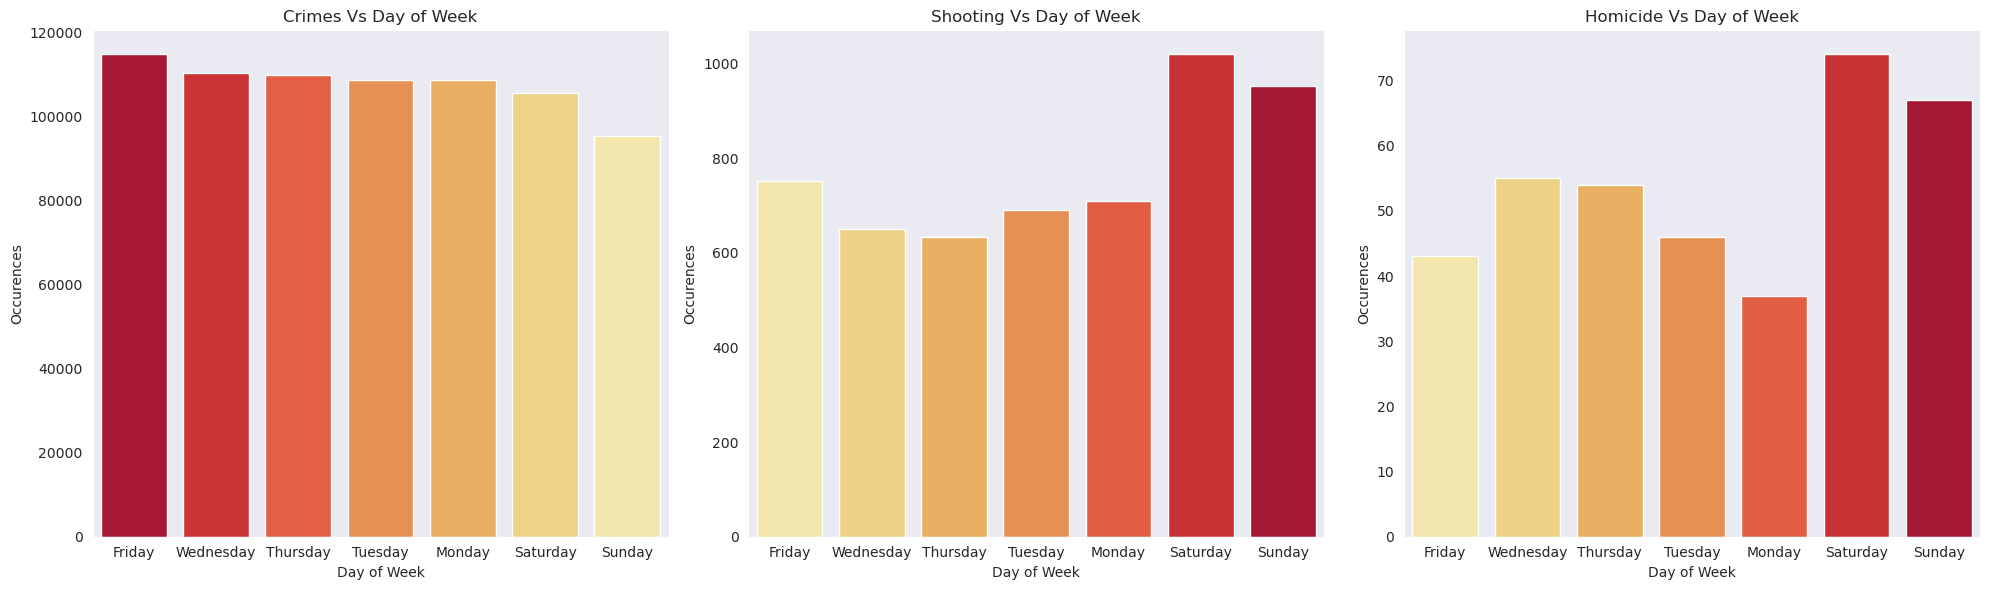

In [144]:
# Create a new dataset with the number of occurrences per day of the week.
day_of_week = boston.groupby('DAY_OF_WEEK', as_index=False)['INCIDENT_NUMBER'].nunique().sort_values(ascending=False, by='INCIDENT_NUMBER')
day_of_week['Shooting'] = day_of_week['DAY_OF_WEEK'].\
    map(boston.query("SHOOTING == 1").groupby('DAY_OF_WEEK')['INCIDENT_NUMBER'].nunique().sort_values(ascending=False).to_dict())
day_of_week['Homicide'] = day_of_week['DAY_OF_WEEK']\
    .map(boston.query("OFFENSE_CODE_GROUP == 'Homicide'").groupby('DAY_OF_WEEK')['INCIDENT_NUMBER'].nunique().sort_values(ascending=False))

#Creates a figure to plot
fig, axes= plt.subplots(nrows=1, ncols=3, figsize=(20,6))

#Creates 3 bar charts to show total crime, shootings, and homicides over the days of the week.
sns.barplot(x=day_of_week['DAY_OF_WEEK'], y=day_of_week['INCIDENT_NUMBER'],palette='YlOrRd_r', ax=axes[0])
sns.barplot(x=day_of_week['DAY_OF_WEEK'], y=day_of_week['Shooting'], palette='YlOrRd', ax=axes[1])
sns.barplot(x=day_of_week['DAY_OF_WEEK'], y=day_of_week['Homicide'], palette='YlOrRd', ax=axes[2])

axes[0].set_title('Crimes Vs Day of Week')
axes[0].set_ylabel("Occurences")
axes[0].set_xlabel('Day of Week')

axes[1].set_title('Shooting Vs Day of Week')
axes[1].set_ylabel("Occurences")
axes[1].set_xlabel('Day of Week')

axes[2].set_title('Homicide Vs Day of Week')
axes[2].set_ylabel("Occurences")
axes[2].set_xlabel('Day of Week')

#Show the plot
plt.tight_layout();

For crime in general, there does not seem to be a big difference between days, with Friday being slightly more than other days and Sunday having less recorded crime.<br>
If we cross the days of the week and shootings and homicides, it changes. Both are more likely to happen at the weekend. With the difference that homicides also have a higher range on Wednesday and Thursday, with Monday being the day with the lowest number of recorded homicides. <br><br>
Looking at other crimes:<br>
    * Assault is also more common on Saturdays and Sundays<br>
    * Burglary on Friday and Monday<br>
    * Auto-theft on Thursday and Friday<br>
    * Robbery on Sunday and Friday<br>
    * Arson on Thursday and Tuesday<br>
    * Home Invasion on Monday, Sunday, and Thursday<br>
    * Breaking and Entering on Tuesday, Thursday, and Monday<br>
    * Embezzlement on Wednesday and Thursday<br>
    * Missing persons follow the overall crime pattern<br>


### <span style='color: #339966'>***Offense Code Group Trend by UCR Part***

In [157]:
#Creates a series of the most common crimes for parts one, two, and three.
p1 = round((boston.query("UCR_PART == 'Part One'")['OFFENSE_CODE_GROUP'].value_counts() / boston.shape[0]) * 100, 2)[:6]
p2 = round((boston.query("UCR_PART == 'Part Two'")['OFFENSE_CODE_GROUP'].value_counts() / boston.shape[0]) * 100,2)[:6]
p3 = (round((boston.query("UCR_PART == 'Part Three'")['OFFENSE_CODE_GROUP'].value_counts() / boston.shape[0]) * 100,2)[:10])

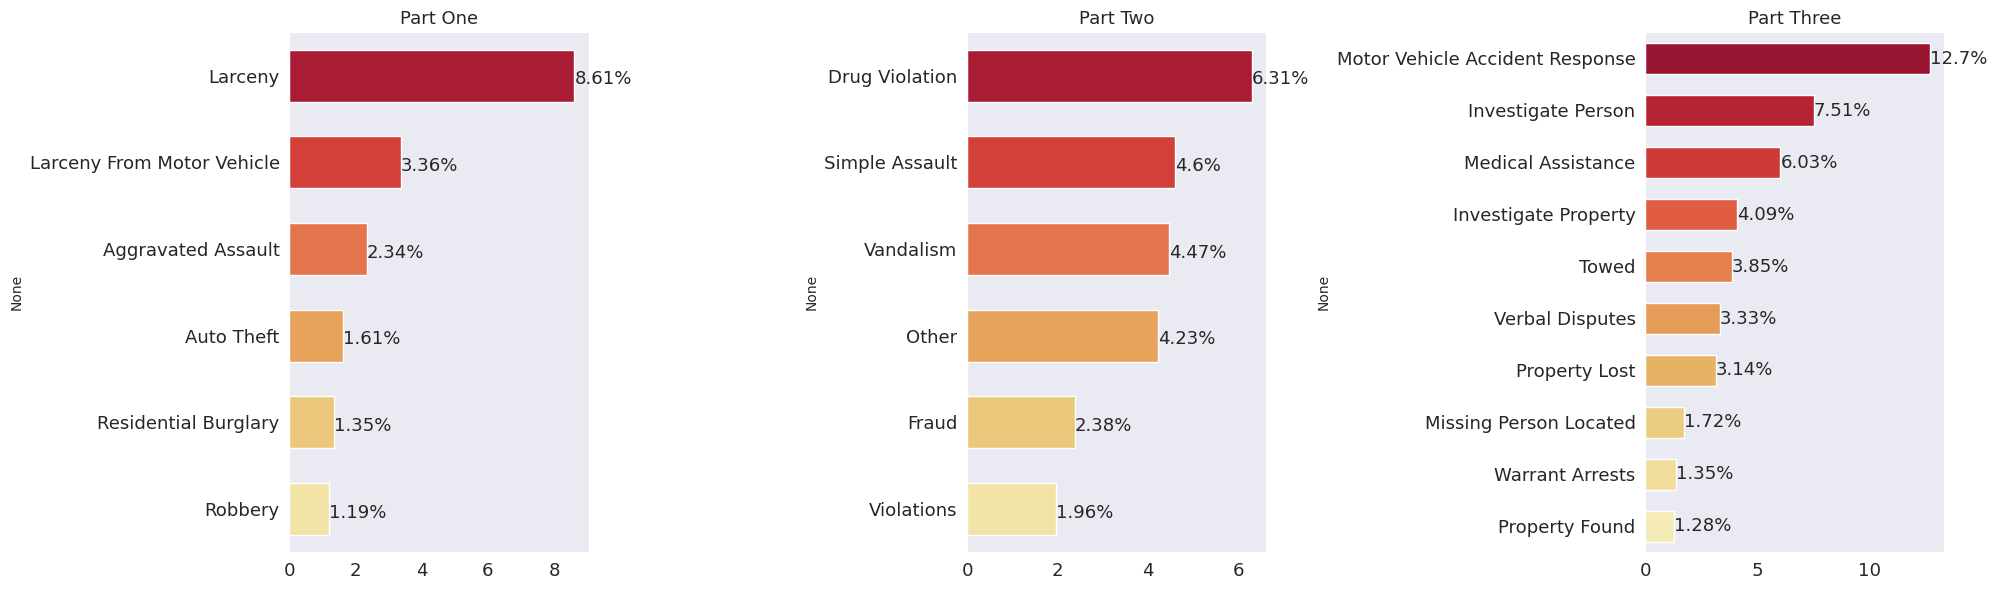

In [158]:
#Create a figure to plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

#Creates 3 bar charts showing the most common crimes in each UCR part 
sns.barplot(x=p1.values, y=p1.index, palette='YlOrRd_r', width=0.6, ax=axes[0])
sns.barplot(x=p2.values, y=p2.index, palette='YlOrRd_r', width=0.6, ax=axes[1])
sns.barplot(x=p3.values, y=p3.index, palette='YlOrRd_r', width=0.6, ax=axes[2])

axes[0].set_title('Part One', fontsize=13)
axes[1].set_title('Part Two', fontsize=13)
axes[2].set_title('Part Three', fontsize=13)

axes[0].tick_params(axis='both', labelsize=13)
axes[1].tick_params(axis='both', labelsize=13)
axes[2].tick_params(axis='both', labelsize=13)

ps = [p1,p2,p3]

#Adds a note about the percentage of occurrences of each crime
for p in range(len(ps)):
    line = 0.1
    for i in range(len(ps[p])):
        axes[p].annotate(
            "{}%".format(ps[p].values[i]), 
            xy=(ps[p].values[i], line),
            fontsize=13)
        line+=1

#Show the plot
plt.tight_layout();

The chart above shows the percentage of the most common crimes for each UCR part.

### <span style='color: #339966'>***Crimes per District***

In [162]:
#Import district shapefile
district = gpd.read_file('../Boston Shapefile/PD/Police_Districts.shp')

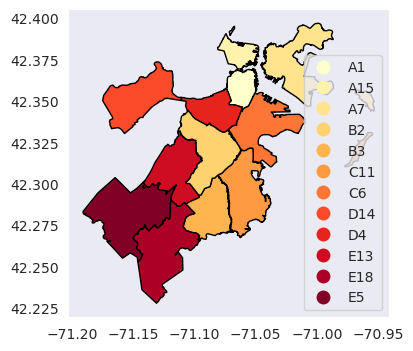

In [163]:
#Create a figure to plot
fig, ax = plt.subplots(figsize=(10,4))

#Creates a map showing the area of the police districts
district.plot(column='DISTRICT',
            edgecolor='black',
            legend=True,
            legend_kwds={'loc': 'lower right'},
            cmap='YlOrRd',
            ax=ax
            )

#Show the plot
plt.show();

Looking at the map above, it's clear that each district covers a similar area, but if we look at the chart below, B2, located in Roxbury, is the district that has recorded more crimes and A15, in Charlestown, has recorded fewer. The same happens in the shooting dataset.

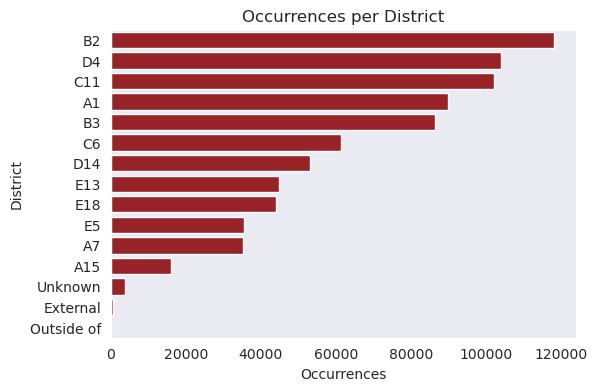

In [164]:
#Determines the order in which police districts appear on the map.
ord_dist = boston.groupby('DISTRICT', as_index=False)['INCIDENT_NUMBER'].count().sort_values(ascending=False, by='INCIDENT_NUMBER')

#Creates a figure to plot
fig, ax = plt.subplots(figsize=(6,4))

#Creates a count chart to show the number of crimes registered in each police district
sns.countplot(y = boston['DISTRICT'], order=ord_dist['DISTRICT'], ax=ax)

plt.title('Occurrences per District')
plt.xlabel('Occurrences')
plt.ylabel('District')

#Show the plot
plt.show();

**Shooting Dataset**
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>District</th>
      <th>Total Occurrences</th>
    </tr>
  </thead>
  <tbody style="text-align: center">
    <tr>
      <td>B2</td>
      <td>570</td>
    </tr>
    <tr>
      <td>B3</td>
      <td>473</td>
    </tr>
    <tr>
      <td>C11</td>
      <td>339</td>
    </tr>
    <tr>
      <td>E13</td>
      <td>153</td>
    </tr>
    <tr>
      <td>E18</td>
      <td>103</td>
    </tr>
    <tr>
      <td>D4</td>
      <td>86</td>
    </tr>
    <tr>
      <td>C6</td>
      <td>68</td>
    </tr>
    <tr>
      <td>A7</td>
      <td>32</td>
    </tr>
    <tr>
      <td>E5</td>
      <td>29</td>
    </tr>
    <tr>
      <td>A1</td>
      <td>27</td>
    </tr>
    <tr>
      <td>D14</td>
      <td>24</td>
    </tr>
    <tr>
      <td>A15</td>
      <td>13</td>
    </tr>
  </tbody>
</table>
</div>

#### <span style='color: #339966'>***Shotting Dataset Analysis*** 

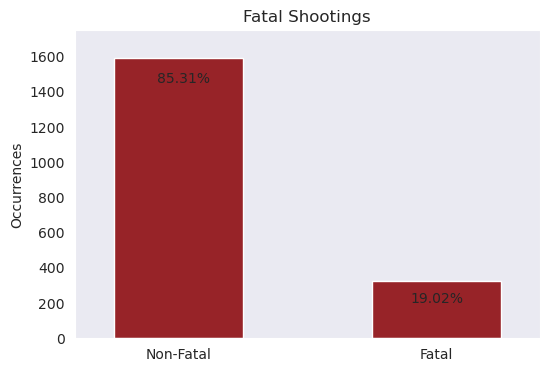

In [180]:
#Percentage
percent = ['85.31%', '19.02%']

#Creates a figure to plot
fig, ax = plt.subplots(figsize=(6,4))

#Creates a bar chart of the shooting type
sns.barplot(shooting['shooting_type_v2'].value_counts(), width=0.5, ax=ax)

plt.title('Fatal Shootings')
plt.ylabel('Occurrences')
plt.margins(0.1,0.1)

#Adds an note of the percentage
ax.annotate(
    percent[0],
    xy=(-0.08, 1450)
)
ax.annotate(
    percent[1],
    xy=(0.9, 200)
)

#Show the plot
plt.show();

Looking at the shooting dataset we have 91.41% of male victims, 79.74% black or african, 73.1% not hispanic or latin and 83.47% of the occurences has only one victim and over 85% are non- fatal shootings.

### <span style='color: #339966'>***Conclusion***
 * Analyzed over 10 eyars of crime data in Boston to uncover time-based and location-based crimes trends.
 * The average number of crimes per day changes over the years. In 2020 the average drops due to the pandemics. Only Sick Assist increases by more than 300% in 2020. After that, the crimes increase again, but don't reach the same values as in the previous years. As for homicides, as we saw before, it follows a trend that was common during the pandemic in several countries, where it increased by 100%.
 *  Looking at the monthly changes over the years, it is clear that the number of offences falls in winter and rises again in March, in spring, and remains high until October.
 * The hours show a similar behaviour regardless of the year, with the majority of crimes occurring at 5 pm. Until 2020, midnight didn't have any peaks, and then it was the hour with the most recorded crimes. Homicides and shootings are more frequent in the late hours.
 * The hours show a similar behaviour regardless of the year, with the majority of crimes occurring at 5 pm. Until 2020, midnight didn't have any peaks, and then it was the hour with the most recorded crimes. Homicides and shootings are more frequent in the late hours.
 * Regardless of the UCR part, the 3 behave quite similarly regardless of the part and follow the same pattern as the other crimes along the hours.
 * In terms of neighbourhoods, surprisingly the Leather District, the smallest, has the highest crime density and South End the highest homicide density, providing a nuanced view of risk distribution.
 * For most crimes, Friday is the day with more records, but when we look at individual crimes such as shootings and homicides, Saturday and Sunday are the days with the most records.
 * For crimes by UCR part, in part one we have larceny and motor vehicle theft in first and second place and aggravated assault in third, in part two drug violation is first and simple assault is second. In the third part we have less serious offences.
 * Although the districts cover a similar area, District B2 in Roxbury has more than 14% of the recorded crimes, while District A15 in Charlestown has only 2%. The data frame for shootings is similar.
 * If we look at the shooting data, only 19% are fatal, with over 91% of victims being male.
 * Sadly, the shooting dataset shows that black or African people make up more than 79% of the victims.


 * In this project I demonstrated proeficiency in Python(Pandas, Seaborn, Matplotlib), data cleaning, geospatial analysis, and data storytelling through clear, well-commented code and visuals.
 * This project highlights how data science can support urban planning, policing strategies, and public awareness through actionable insights.
